In [1]:
import os

os.chdir('../..')

In [2]:
import pandas as pd
from os.path import join
import numpy as np

import matplotlib.pyplot as plt
import analysis.plotting as pl

import modules.linear_algebra as lin
import modules.assign_sides as asi

In [3]:
df_truth = pd.read_pickle(join('results', 'dataframes', 'df_truth.pkl')).loc['2014-12-03_P005_Post_002']

In [4]:
df_truth = df_truth[['HEAD', 'L_FOOT', 'R_FOOT']].dropna().loc[1:150]

In [5]:
frames = df_truth.index.values

In [22]:
truth_l = np.stack(df_truth.L_FOOT)
truth_r = np.stack(df_truth.R_FOOT)

In [34]:
def convert_to_2d(points_real):
    
    x_vals, _, depths = points_real.T
    
    x_vals_new = -depths
    y_vals_new = x_vals
    
    return np.column_stack([x_vals_new, y_vals_new])

In [37]:
truth_2d_l = convert_to_2d(truth_l)
truth_2d_r = convert_to_2d(truth_r)

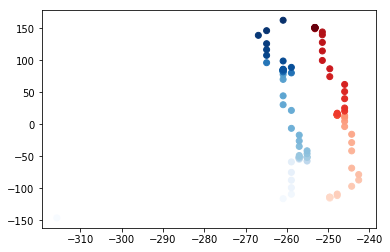

In [38]:
plt.figure()

pl.scatter2(truth_2d_l, c=frames, cmap='Blues')
pl.scatter2(truth_2d_r, c=frames, cmap='Reds')

# plt.xlim((200, 350))

In [9]:
# _, direction = asi.direction_of_pass(df_truth)

In [10]:
side_total = 0
for foot_point_a, foot_point_b in zip(truth_2d_l, truth_2d_r):
    side_total += lin.side_value_2d(foot_point_a, foot_point_b, [0, 1])